In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import NASNetMobile



import keras.metrics

from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
#import torch
#import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.applications.resnet import ResNet50
from keras.models import Model
import keras

In [2]:

trainVGG = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
testVGG = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validationVGG = ImageDataGenerator(rescale = 1./255)

In [3]:
IMAGE_SIZE_VGG = (224, 224)
NUM_EPOCHS_VGG = 50
BATCH_SIZE_VGG = 32
LEARNING_RATE_VGG = 0.001
DROP_OUT_VGG = 0.3


train_dataset_VGG = trainVGG.flow_from_directory('dataset/Train/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset_VGG = trainVGG.flow_from_directory('dataset/Test/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset_VGG = trainVGG.flow_from_directory('dataset/Validation/',
                                         target_size = IMAGE_SIZE_VGG,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_VGG,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [4]:
validation_dataset_VGG.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [5]:
STEP_SIZE_TRAIN_VGG=len(train_dataset_VGG)
STEP_SIZE_VALID_VGG=len(validation_dataset_VGG)

In [6]:
conv_base_VGG = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base_VGG.trainable = False

model_VGG = models.Sequential()
model_VGG.add(conv_base_VGG)
model_VGG.add(layers.Flatten())
model_VGG.add(layers.Dense(128, activation='relu'))
model_VGG.add(Dropout(DROP_OUT_VGG))
model_VGG.add(layers.Dense(4, activation='softmax'))
model_VGG.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=LEARNING_RATE_VGG), metrics=['acc'])
model_VGG.save('NASNetMobile.model')

INFO:tensorflow:Assets written to: NASNetMobile.model\assets


INFO:tensorflow:Assets written to: NASNetMobile.model\assets
C:\Users\Hp\AppData\Roaming\Python\Python36\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [7]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [8]:
print(model_VGG.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 7, 7, 1056)        4269716   
_________________________________________________________________
flatten (Flatten)            (None, 51744)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6623360   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 10,893,592
Trainable params: 6,623,876
Non-trainable params: 4,269,716
_________________________________________________________________
None


In [9]:
from keras.callbacks import CSVLogger
csv_VGG19 = CSVLogger('NASNetMobile.log', separator=',', append=False)

history_VGG=model_VGG.fit(train_dataset_VGG,
 steps_per_epoch =STEP_SIZE_TRAIN_VGG,
 validation_data = validation_dataset_VGG,
 validation_steps = STEP_SIZE_VALID_VGG,
 epochs= NUM_EPOCHS_VGG,
 callbacks=[early_stop]
 )

Epoch 1/50
100/100 [==============================] - 221s 2s/step - loss: 7.6828 - acc: 0.3800 - val_loss: 0.8507 - val_acc: 0.5669
Epoch 2/50
100/100 [==============================] - 204s 2s/step - loss: 1.2443 - acc: 0.4875 - val_loss: 0.7251 - val_acc: 0.6769
Epoch 3/50
100/100 [==============================] - 4926s 50s/step - loss: 1.0844 - acc: 0.5666 - val_loss: 0.5896 - val_acc: 0.7688
Epoch 4/50
100/100 [==============================] - 204s 2s/step - loss: 1.0843 - acc: 0.6112 - val_loss: 4.8506 - val_acc: 0.4350
Epoch 5/50
100/100 [==============================] - 204s 2s/step - loss: 0.9072 - acc: 0.6844 - val_loss: 0.4373 - val_acc: 0.7831
Epoch 6/50
100/100 [==============================] - 204s 2s/step - loss: 0.8124 - acc: 0.7147 - val_loss: 0.2974 - val_acc: 0.9025
Epoch 7/50
100/100 [==============================] - 204s 2s/step - loss: 0.6237 - acc: 0.7572 - val_loss: 0.3185 - val_acc: 0.8888
Epoch 8/50
100/100 [==============================] - 205s 2s/step 

In [10]:
model_VGG.evaluate(test_dataset_VGG)

25/25 [==============================] - 34s 1s/step - loss: 0.6955 - acc: 0.8587


[0.6955322027206421, 0.8587499856948853]

In [11]:
predictions_VGG = model_VGG.predict(x=test_dataset_VGG, verbose=0)

In [12]:
rounded_predictions_VGG = np.argmax(predictions_VGG, axis=-1)

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [14]:
cm_VGG = confusion_matrix(y_true=test_dataset_VGG.classes, y_pred=rounded_predictions_VGG)

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[135  57   6   2]
 [  1 199   0   0]
 [  3   3 194   0]
 [ 20  26   5 149]]


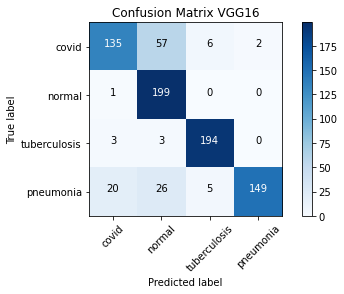

In [16]:
cm_plot_labels = ['covid', 'normal','tuberculosis', 'pneumonia']
plot_confusion_matrix(cm=cm_VGG, classes=cm_plot_labels, title='Confusion Matrix VGG16')

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [18]:
labels = ['covid', 'normal','tuberculosis', 'pneumonia']
report_VGG = classification_report(test_dataset_VGG.classes, rounded_predictions_VGG, target_names=labels)
print(report_VGG)


              precision    recall  f1-score   support

       covid       0.85      0.68      0.75       200
      normal       0.70      0.99      0.82       200
tuberculosis       0.95      0.97      0.96       200
   pneumonia       0.99      0.74      0.85       200

    accuracy                           0.85       800
   macro avg       0.87      0.85      0.84       800
weighted avg       0.87      0.85      0.84       800



In [19]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.show()

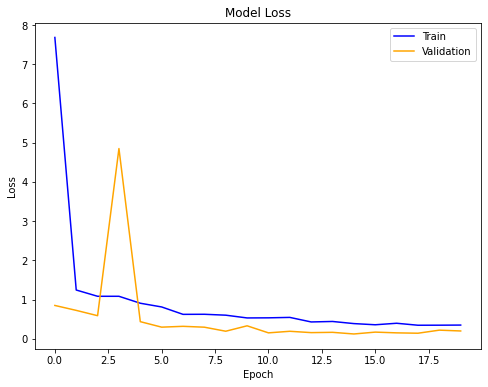

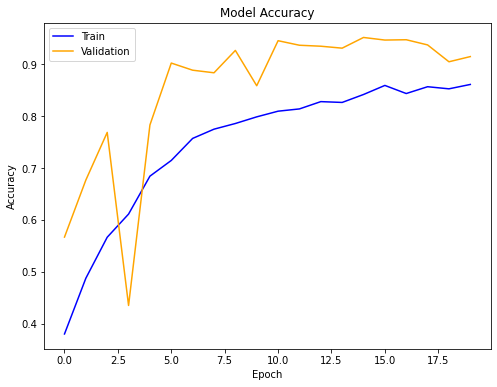

In [20]:
plot_loss_acc(history_VGG)

###### 